In [96]:
import pandas as pd 
import re
import numpy as np
from opencc import OpenCC

In [97]:
TB = pd.read_csv( 'https://raw.githubusercontent.com/SophonPlus/ChineseNlpCorpus/master/datasets/waimai_10k/waimai_10k.csv' ) 

In [98]:
TB.head()

,label,review
0,1,很快，好吃，味道足，量大
1,1,没有送水没有送水没有送水
2,1,非常快，态度好。
3,1,方便，快捷，味道可口，快递给力
4,1,菜味道很棒！送餐很及时！


In [99]:
pattern = re.compile( r".{1}" )
cc = OpenCC( 's2twp' )
myData = [ pattern.findall( cc.convert(x) ) for x in TB.review ]

In [100]:
import tensorflow as tf 

In [101]:
tokenizer = tf.keras.preprocessing.text.Tokenizer( filters = "" ) 
tokenizer.fit_on_texts( myData )
print( tokenizer.index_word )

{1: '，', 2: '了', 3: '的', 4: '不', 5: '送', 6: '！', 7: '。', 8: '是', 9: '好', 10: '一', 11: ',', 12: '吃', 13: '很', 14: '餐', 15: '沒', 16: '還', 17: '點', 18: '有', 19: '時', 20: '個', 21: '太', 22: '我', 23: '到', 24: '都', 25: '小', 26: '就', 27: '味', 28: '也', 29: '道', 30: '快', 31: '度', 32: '菜', 33: '來', 34: '這', 35: '麼', 36: '肉', 37: '錯', 38: '飯', 39: '次', 40: '多', 41: '慢', 42: '給', 43: '1', 44: '子', 45: '說', 46: '要', 47: '差', 48: '下', 49: '家', 50: '？', 51: '以', 52: '大', 53: '在', 54: '可', 55: '真', 56: '少', 57: '餅', 58: '裡', 59: '速', 60: '外', 61: '過', 62: '人', 63: '訂', 64: '…', 65: '話', 66: '後', 67: '0', 68: '兩', 69: '分', 70: '單', 71: '能', 72: '才', 73: '等', 74: '電', 75: '賣', 76: '半', 77: '量', 78: '2', 79: '涼', 80: '上', 81: '員', 82: '難', 83: '服', 84: '再', 85: '打', 86: '別', 87: '常', 88: '般', 89: '間', 90: '天', 91: '辣', 92: '.', 93: '非', 94: '雞', 95: '你', 96: '啊', 97: '會', 98: '但', 99: '豆', 100: '面', 101: '什', 102: '超', 103: '特', 104: '態', 105: '評', 106: '包', 107: '全', 108: '店', 109: '配', 110: '米', 111: '和

In [102]:
myTxtTensor = tokenizer.texts_to_sequences( myData )
print( myTxtTensor[0] )

[13, 30, 1, 9, 12, 1, 27, 29, 229, 1, 77, 52]


In [103]:
myTxtTensor = tf.keras.preprocessing.sequence.pad_sequences( 
    myTxtTensor , 
    padding = "post" , 
    truncating = 'post' , 
    maxlen = 30 
)

In [104]:
myTxtTensor[0:3]

array([[ 13,  30,   1,   9,  12,   1,  27,  29, 229,   1,  77,  52,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 15,  18,   5, 248,  15,  18,   5, 248,  15,  18,   5, 248,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 93,  87,  30,   1, 104,  31,   9,   7,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]])

In [105]:
numWords = len( tokenizer.index_word )
embedding_dim = 250  ## input layer 250維度

In [106]:
from tensorflow.keras import layers

In [107]:
embeding_layer= layers.Embedding( numWords+1 , embedding_dim )
embeding_layer( tf.constant( [ 13 , 30 , 1 ] ) )

<tf.Tensor: shape=(3, 250), dtype=float32, numpy=
array([[ 2.41388008e-03,  3.45682539e-02,  4.83712889e-02,
        -3.53626236e-02,  2.38120444e-02,  1.54484436e-03,
         4.97140735e-03, -1.36467107e-02, -1.72975175e-02,
        -4.95385528e-02, -3.87925021e-02, -2.18656659e-02,
         1.66252740e-02,  4.39215638e-02,  6.36436045e-04,
         1.80891268e-02, -4.46827188e-02, -4.66896296e-02,
        -4.74753976e-02,  4.24263217e-02, -3.14521566e-02,
        -2.29035690e-03, -1.08821392e-02, -1.54270157e-02,
         4.96533029e-02,  1.62341632e-02,  3.39655988e-02,
        -3.50593701e-02,  4.70822342e-02,  2.47853138e-02,
        -4.44382913e-02,  2.55679823e-02, -2.39331257e-02,
        -4.09443602e-02, -2.06969269e-02, -4.94291559e-02,
        -3.71488109e-02,  1.16226673e-02,  4.68688495e-02,
         4.44371216e-02,  4.57502864e-02,  2.09861733e-02,
         2.32850574e-02,  4.69826795e-02, -4.13092151e-02,
         2.94377096e-02, -9.26098973e-03, -4.98477109e-02,
      

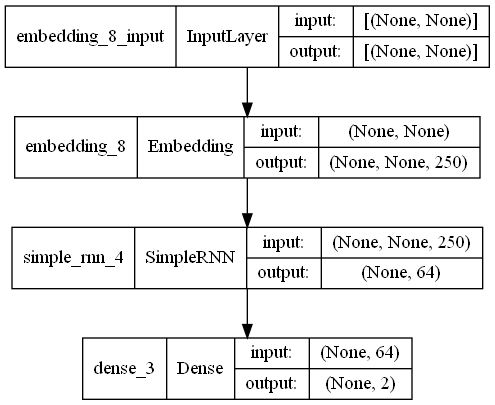

In [108]:
RNN_C = tf.keras.Sequential() 
RNN_C.add( layers.Embedding( numWords + 1 , embedding_dim ) )
RNN_C.add( layers.SimpleRNN( 64 ) )
RNN_C.add( layers.Dense( 2 , activation = 'softmax' ) )
tf.keras.utils.plot_model( RNN_C , show_shapes = True )

In [109]:
RNN_C.compile( 
    optimizer = "adam" ,
    loss = tf.losses.sparse_categorical_crossentropy , 
    metrics = [ 'accuracy' ]
)
RNN_C.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 250)         628500    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                20160     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 648,790
Trainable params: 648,790
Non-trainable params: 0
_________________________________________________________________


In [110]:
RNN_C.fit( myTxtTensor, TB.label , epochs = 10 )

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3844 - accuracy: 0.8413
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2716 - accuracy: 0.9000
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2253 - accuracy: 0.9174
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1930 - accuracy: 0.9314
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1554 - accuracy: 0.9464
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1317 - accuracy: 0.9572
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1099 - accuracy: 0.9652
Epoch 8/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0943 - accuracy: 0.9690
Epoch 9/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0960 - accuracy: 0.9686
Epoch 10/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0824 - accuracy: 0.972

In [158]:
newSen = pattern.findall( "好吃" )
newSen = [ newSen ]
print( newSen )

[['好', '吃']]


In [159]:
newSen = tokenizer.texts_to_sequences( newSen )
print( newSen )

[[9, 12]]


In [160]:
newSen = tf.keras.preprocessing.sequence.pad_sequences( 
    newSen , 
    padding = 'post' , 
    truncating = 'post' , 
    maxlen = 30 
) 
print( newSen )

[[ 9 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]]


In [161]:
predict = RNN_C.predict( newSen )

In [162]:
print( "正向" if predict.argmax() else "反向" )

正向
